In [1]:
import pandas as pd
import scipy
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Sales amount (Product category = Higher revenue)

In [2]:
df_sales = pd.read_csv("OnlineSalesData.csv")
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB
None


In [9]:
from scipy.stats import spearmanr

correlation = spearmanr(
    a=df_sales["Product Category"], 
    b=df_sales["Total Revenue"]
    )

print(correlation)

SignificanceResult(statistic=np.float64(0.671149125050433), pvalue=np.float64(8.828490226709026e-33))


## Total revenue per month

In [19]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

df_sales['Month'] = df_sales['Date'].dt.to_period('M')

monthly_sales = df_sales.groupby('Month')['Total Revenue'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].dt.strftime('%B')

month_order = pd.date_range(start='2024-01-01', periods=12, freq='MS').strftime('%B')

monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

monthly_sales = monthly_sales.sort_values('Total Revenue', ascending=False)

monthly_sales

,Month,Total Revenue
0,January,14548.32
2,March,12849.24
3,April,12451.69
1,February,10803.37
4,May,8455.49
5,June,7384.55
7,August,7278.11
6,July,6797.08


# Best performer product categories

In [20]:
category_revenue = df_sales.groupby('Product Category')['Total Revenue'].sum().reset_index()

category_revenue = category_revenue.sort_values('Total Revenue', ascending=False)

category_revenue


,Product Category,Total Revenue
3,Electronics,34982.41
4,Home Appliances,18646.16
5,Sports,14326.52
2,Clothing,8128.93
0,Beauty Products,2621.90
1,Books,1861.93


# Charts

In [10]:
Q1 = df_sales['Unit Price'].quantile(0.25)
Q3 = df_sales['Unit Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_sales[(df_sales['Unit Price'] >= lower_bound) & (df_sales['Unit Price'] <= upper_bound)]


<Axes: xlabel='Units Sold', ylabel='Unit Price'>

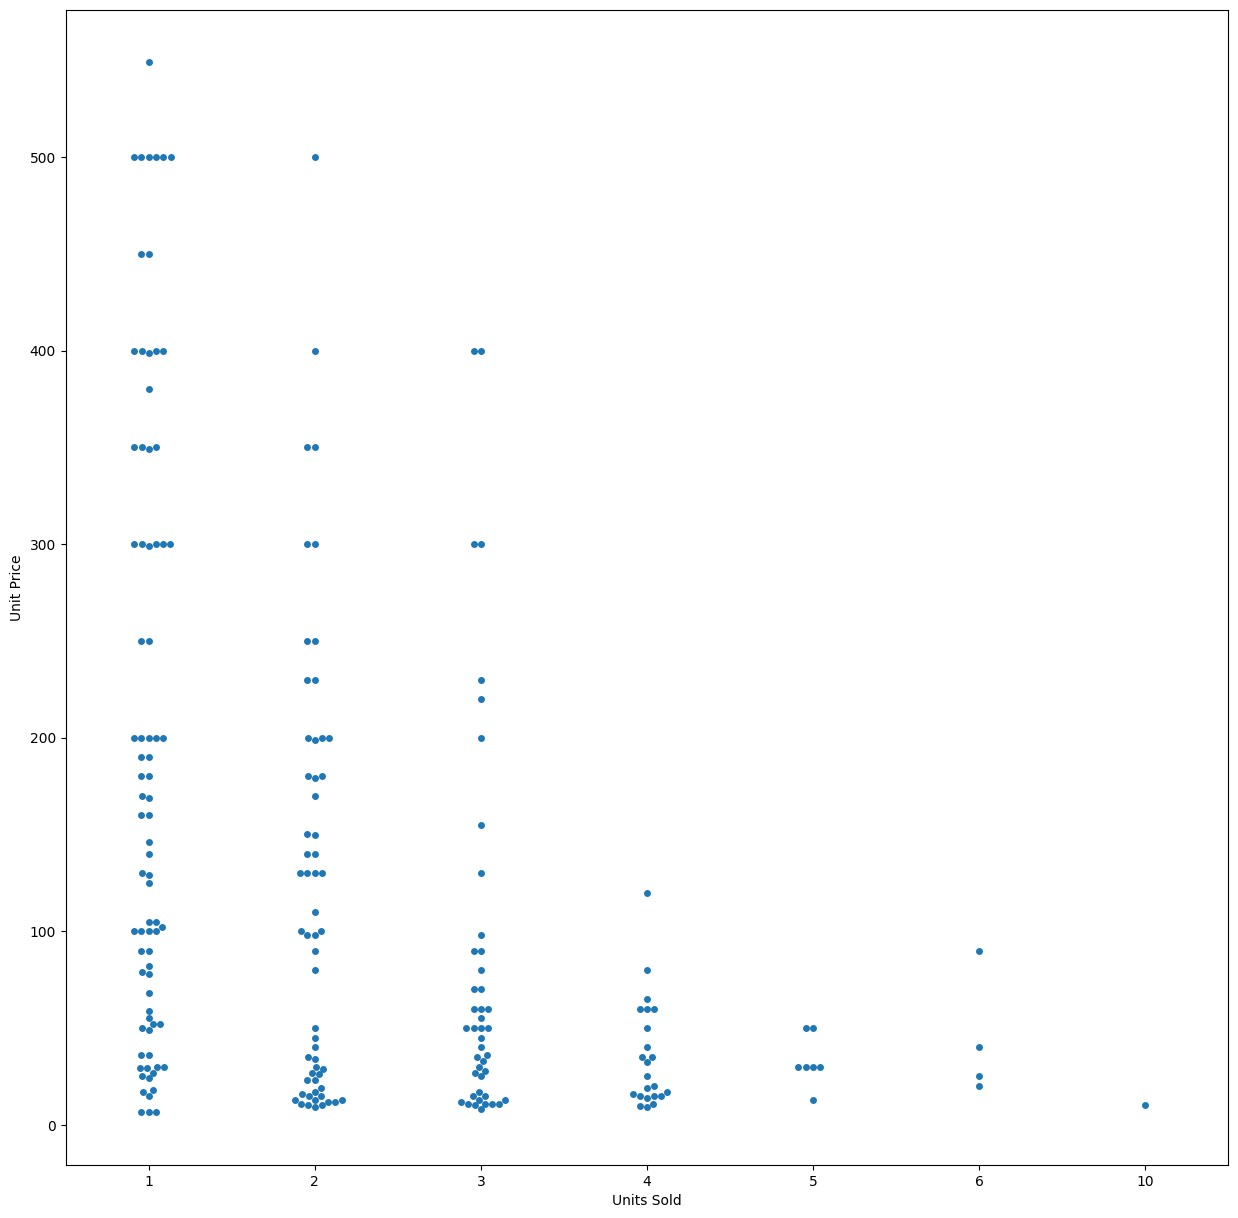

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.swarmplot(x="Units Sold", 
              y="Unit Price", 
              data=df_filtered,
              size=5
              )